In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import causallearn

#from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import io
import os
plt.style.use('seaborn')

C:\Users\Qiong\AppData\Local\Temp\ipykernel_31852\1348640686.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
# Define a list of potential marker styles
markers = ['o', 's', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'D', 'd', '|', '_']

## Specify the experimental data 

In [4]:
path = "../data/pcm/fixed_rate/1510B-4096"

### Read the PCM statistics

In [5]:
core = pd.read_csv(path+"/"+ "bridge-pcm.csv",  header=[0,1])
print(core.describe())

         Socket 0                                                              \
             EXEC         IPC        FREQ       AFREQ      L3MISS      L2MISS   
count  583.000000  583.000000  583.000000  583.000000  583.000000  583.000000   
mean     0.572316    2.946981    0.193396    1.178285    0.089468   10.817204   
std      0.010151    0.165658    0.010244    0.006160    0.126280    0.604951   
min      0.520000    2.050000    0.190000    1.140000    0.030000   10.120000   
25%      0.570000    2.980000    0.190000    1.180000    0.040000   10.520000   
50%      0.570000    3.000000    0.190000    1.180000    0.050000   10.660000   
75%      0.580000    3.020000    0.190000    1.180000    0.060000   10.780000   
max      0.580000    3.040000    0.260000    1.190000    0.780000   13.610000   

                                                  ... Core3 (Socket 0)  \
            L3HIT       L2HIT  L3MPI       L2MPI  ...           C7res%   
count  583.000000  583.000000  583.0  583

In [6]:
core.columns

MultiIndex([(              'System',                'Date'),
            (              'System',                'Time'),
            (            'Socket 0',                'EXEC'),
            (            'Socket 0',                 'IPC'),
            (            'Socket 0',                'FREQ'),
            (            'Socket 0',               'AFREQ'),
            (            'Socket 0',              'L3MISS'),
            (            'Socket 0',              'L2MISS'),
            (            'Socket 0',               'L3HIT'),
            (            'Socket 0',               'L2HIT'),
            (            'Socket 0',               'L3MPI'),
            (            'Socket 0',               'L2MPI'),
            (            'Socket 0',               'L3OCC'),
            (            'Socket 0',                'READ'),
            (            'Socket 0',               'WRITE'),
            (            'Socket 0',               'LOCAL'),
            (           

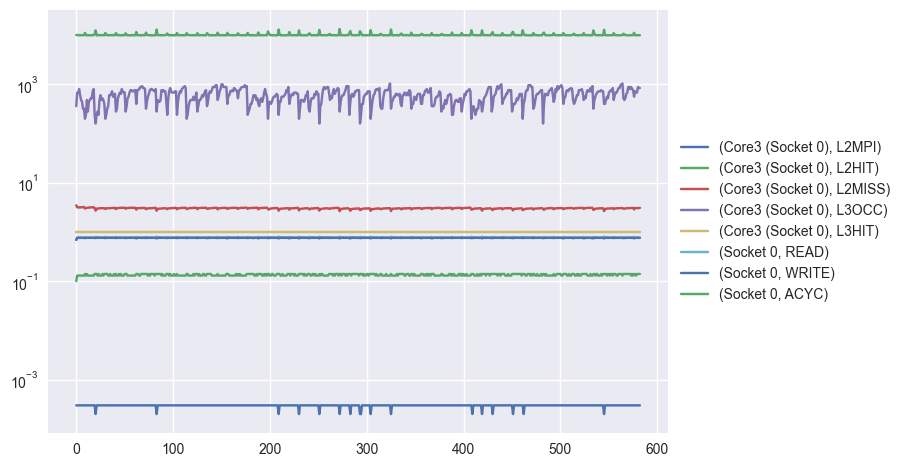

In [7]:
core[[('Core3 (Socket 0)', 'L2MPI'), ('Core3 (Socket 0)', 'L2HIT'), 
    ('Core3 (Socket 0)', 'L2MISS'), ('Core3 (Socket 0)', 'L3OCC'), ('Core3 (Socket 0)', 'L3HIT'), 
    ('Socket 0', 'READ'), ('Socket 0', 'WRITE'), ('Socket 0', 'ACYC')]].plot(logy=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [8]:
columns_filtered = [col for col in core.columns if "Core3" in col[0]] + [('Socket 0', 'READ'), ('Socket 0', 'WRITE')]
core_filtered = core[columns_filtered]
core_filtered.columns = [col[1] for col in columns_filtered]

# Drop TEMP, INST, ACYC, TIME(ticks)
core_filtered.drop(columns=["TEMP", "INST", "ACYC", "TIME(ticks)"], inplace=True)
core_filtered

C:\Users\Qiong\AppData\Local\Temp\ipykernel_31852\2366661695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_filtered.drop(columns=["TEMP", "INST", "ACYC", "TIME(ticks)"], inplace=True)


,EXEC,IPC,FREQ,AFREQ,L3MISS,L2MISS,L3HIT,L2HIT,L3MPI,L2MPI,...,C1res%,C3res%,C6res%,C7res%,PhysIPC,PhysIPC%,INSTnom,INSTnom%,READ,WRITE
0,4.43,3.75,1.18,1.19,0.00,3.47,1.0,0.10,0.0,0.0003,...,0.32,0.0,0.0,0.0,7.50,187.44,8.86,221.56,0.69,0.69
1,4.46,3.77,1.19,1.19,0.01,3.17,1.0,0.13,0.0,0.0003,...,0.23,0.0,0.0,0.0,7.53,188.28,8.93,223.13,0.77,0.76
2,4.46,3.76,1.18,1.19,0.00,3.15,1.0,0.13,0.0,0.0003,...,0.25,0.0,0.0,0.0,7.53,188.19,8.91,222.84,0.77,0.76
3,4.47,3.76,1.19,1.19,0.01,3.17,1.0,0.13,0.0,0.0003,...,0.19,0.0,0.0,0.0,7.53,188.22,8.94,223.44,0.77,0.76
4,4.46,3.77,1.19,1.19,0.00,3.14,1.0,0.13,0.0,0.0003,...,0.25,0.0,0.0,0.0,7.53,188.34,8.93,223.19,0.77,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,4.47,3.77,1.19,1.19,0.00,3.06,1.0,0.13,0.0,0.0003,...,0.25,0.0,0.0,0.0,7.54,188.59,8.94,223.57,0.77,0.76
579,4.48,3.77,1.19,1.19,0.00,3.05,1.0,0.14,0.0,0.0003,...,0.20,0.0,0.0,0.0,7.55,188.67,8.96,223.90,0.77,0.76
580,4.46,3.76,1.19,1.19,0.00,3.06,1.0,0.14,0.0,0.0003,...,0.24,0.0,0.0,0.0,7.52,188.05,8.92,222.96,0.77,0.76
581,4.47,3.77,1.19,1.19,0.00,3.07,1.0,0.14,0.0,0.0003,...,0.23,0.0,0.0,0.0,7.53,188.25,8.93,223.32,0.77,0.76


### Read the PCM-Memory statistics

In [9]:
mem = pd.read_csv(path+"/"+ "pcm-memory.csv",  header=[0,1])

print("Data dimension: ", mem.shape)
print("Data columns: ", mem.columns)

Data dimension:  (583, 29)
Data columns:  MultiIndex([('Unnamed: 0_level_0',             'Date'),
            ('Unnamed: 1_level_0',             'Time'),
            (              'SKT0',          'Ch0Read'),
            (              'SKT0',         'Ch0Write'),
            (              'SKT0',          'Ch1Read'),
            (              'SKT0',         'Ch1Write'),
            (              'SKT0',          'Ch2Read'),
            (              'SKT0',         'Ch2Write'),
            (              'SKT0',          'Ch3Read'),
            (              'SKT0',         'Ch3Write'),
            (              'SKT0',  'Mem Read (MB/s)'),
            (              'SKT0', 'Mem Write (MB/s)'),
            (              'SKT0',   'P. Write (T/s)'),
            (              'SKT0',    'Memory (MB/s)'),
            (              'SKT1',          'Ch0Read'),
            (              'SKT1',         'Ch0Write'),
            (              'SKT1',          'Ch1Read'),
      

#### Visualizing the memory statistics of Socket 0

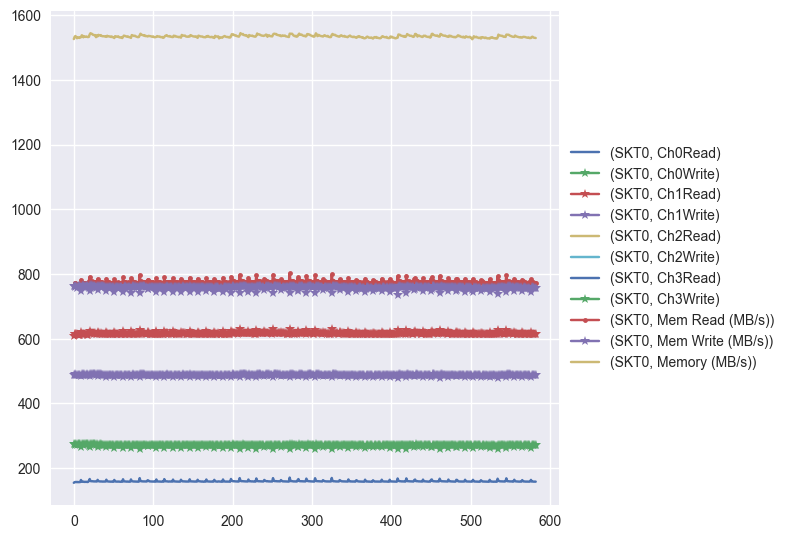

In [10]:
# Plot each column with a random marker
ax = None
markers=['x','.','+','*']
for col in mem.columns:
    if "SKT0" in col and not 'P. Write (T/s)' in col:
        ax = mem[col].plot(marker=np.random.choice(markers), ax=ax)
    
#plt.yscale("log")
# Adjust legend and layout
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
#plt.savefig("1.png")

In [11]:
#filename = path.split("/")[-1]
#plt.savefig(filename + "-mem"+ ".pdf")

In [12]:
columns_filtered = [col for col in mem.columns if "SKT0" in col[0]] 
mem_filtered = mem[columns_filtered]
mem_filtered.columns = [col[1] for col in columns_filtered]
mem_filtered.columns

Index(['Ch0Read', 'Ch0Write', 'Ch1Read', 'Ch1Write', 'Ch2Read', 'Ch2Write',
       'Ch3Read', 'Ch3Write', 'Mem Read (MB/s)', 'Mem Write (MB/s)',
       'P. Write (T/s)', 'Memory (MB/s)'],
      dtype='object')

### Read the PCM-pcie statistics

In [13]:
pcie = pd.read_csv(path+"/"+ "pcm-pcie.csv", )
print("Data description: ", pcie.describe())

Data description:           Skt  PCIRdCur   RFO   CRd   DRd  ItoM   PRd   WiL
count   1733      1733  1733  1733  1733  1733  1733  1733
unique     3      1126   598  1151  1149   575   108   503
top        0  PCIRdCur   RFO   CRd   DRd  ItoM   PRd   WiL
freq     578       577   577   577   577   577   577   577


In [14]:
pcie.columns

Index(['Skt', 'PCIRdCur', 'RFO', 'CRd', 'DRd', 'ItoM', 'PRd', 'WiL'], dtype='object')

In [15]:
pcie.head(10)

,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
0,0,5356750,781732,876512,9508450,9008314,42,106316
1,1,20321672,62720,3237500,7018732,0,13692,76300
2,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
3,0,5648076,825510,291928,8914794,9295762,0,107086
4,1,20315722,62790,3183698,4923282,0,13678,76496
5,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
6,0,5703054,835212,939162,8324148,9382450,0,108262
7,1,20312264,62664,2992990,5938660,0,13692,76496
8,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
9,0,5801250,834736,331254,8298668,9488920,0,109186


In [16]:
# Separate the rows into timestamps and values
skt_1 = pcie[0::3]
skt_2 = pcie[1::3]

skt_1 = skt_1.drop(columns="Skt")
skt_2 = skt_2.drop(columns="Skt")

skt_1 = skt_1.add_prefix("skt0-")
skt_2= skt_2.add_prefix("skt1-")

print("Socket 0 pcie statistics: ", skt_1.describe())
print("Socket 0 sample header: ", skt_1.head())

Socket 0 pcie statistics:         skt0-PCIRdCur skt0-RFO skt0-CRd skt0-DRd skt0-ItoM skt0-PRd skt0-WiL
count            578      578      578      578       578      578      578
unique           573      531      574      572       572       52      379
top          5444418   804244   284508  7800478   9107070        0   102256
freq               2        3        2        2         2      237        6
Socket 0 sample header:     skt0-PCIRdCur skt0-RFO skt0-CRd skt0-DRd skt0-ItoM skt0-PRd skt0-WiL
0        5356750   781732   876512  9508450   9008314       42   106316
3        5648076   825510   291928  8914794   9295762        0   107086
6        5703054   835212   939162  8324148   9382450        0   108262
9        5801250   834736   331254  8298668   9488920        0   109186
12       5738740   842156   891660  8247302   9384200        0   108976


In [17]:
skt_1 = skt_1.reset_index(drop=True).dropna().astype(float)
print(skt_1.describe())
print(skt_1)

       skt0-PCIRdCur       skt0-RFO      skt0-CRd      skt0-DRd     skt0-ItoM  \
count   5.780000e+02     578.000000  5.780000e+02  5.780000e+02  5.780000e+02   
mean    5.433423e+06  806080.640138  7.105240e+05  8.051192e+06  9.002644e+06   
std     2.043287e+05   29723.643693  9.269982e+05  4.630899e+05  3.266198e+05   
min     4.087482e+06  638120.000000  1.670060e+05  7.404516e+06  6.992664e+06   
25%     5.391687e+06  800478.000000  2.753450e+05  7.822692e+06  8.945636e+06   
50%     5.465362e+06  811034.000000  3.368890e+05  7.917525e+06  9.059981e+06   
75%     5.527218e+06  820473.500000  7.255430e+05  8.054830e+06  9.186986e+06   
max     5.821956e+06  954478.000000  6.449618e+06  1.087649e+07  9.488920e+06   

           skt0-PRd       skt0-WiL  
count    578.000000     578.000000  
mean     190.768166  102754.598616  
std      656.357919    3951.274849  
min        0.000000   77042.000000  
25%        0.000000  101811.500000  
50%      140.000000  103376.000000  
75%      16

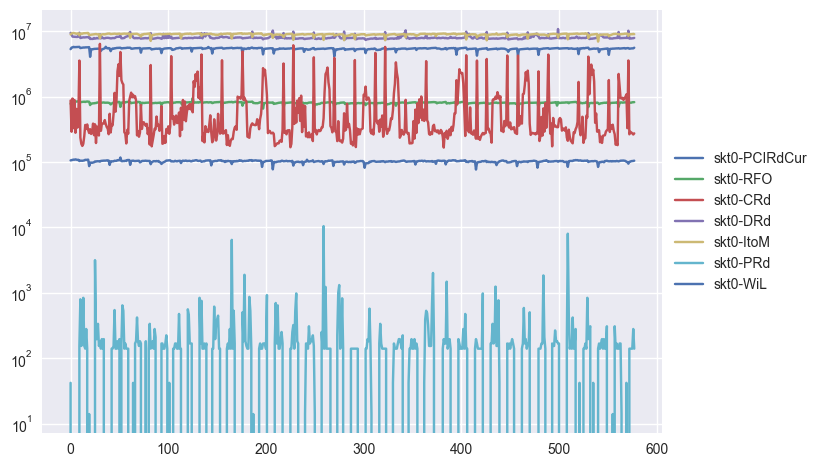

In [18]:
skt_1.plot(logy=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Read the end-to-end KPIs, i.e., input rate, output rate, and latency
#### Read the input rate (in Gbps)

In [19]:
tx = pd.read_csv(path+"/tx_stats.csv")["MbitWithFraming"].reset_index(drop=True)
print("Data description:", tx.describe())

Data description: count     586.000000
mean     9956.139547
std       416.191504
min      2709.619702
25%      9987.371027
50%      9990.989132
75%      9993.027459
max      9997.955254
Name: MbitWithFraming, dtype: float64


#### Read the output rate, i.e., the throughput

In [20]:
rx = pd.read_csv(path+"/rx_stats.csv")["MbitWithFraming"].reset_index(drop=True)
print("Data description: ", rx.describe())

Data description:  count     586.000000
mean     2570.881101
std       112.651422
min       535.534883
25%      2548.001616
50%      2585.880974
75%      2618.876055
max      3147.503432
Name: MbitWithFraming, dtype: float64


In [21]:
# Rename the column names to distinguish TX and RX statistics
tx.name = "Input_rate"
rx.name = "Output_rate"

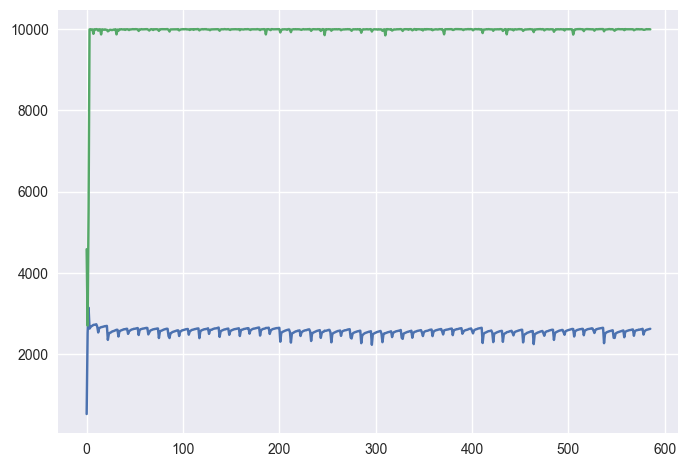

In [22]:
#plt.xlim(50,100)
plt.plot(rx)
plt.plot(tx)

In [23]:
causal_df = pd.concat([core_filtered, skt_1, mem_filtered, tx, rx], axis=1)[:len(rx)]

# Drop columns with constant values
causal_df = causal_df.loc[:, causal_df.nunique() > 1]

# Drop the energy metrics
causal_df.drop(columns=[col for col in causal_df.columns if "res" in col], inplace=True)
print(causal_df.columns)
causal_df.head()

Index(['EXEC', 'IPC', 'FREQ', 'AFREQ', 'L3MISS', 'L2MISS', 'L2HIT', 'L2MPI',
       'L3OCC', 'PhysIPC', 'PhysIPC%', 'INSTnom', 'INSTnom%', 'READ', 'WRITE',
       'skt0-PCIRdCur', 'skt0-RFO', 'skt0-CRd', 'skt0-DRd', 'skt0-ItoM',
       'skt0-PRd', 'skt0-WiL', 'Ch0Read', 'Ch0Write', 'Ch1Read', 'Ch1Write',
       'Mem Read (MB/s)', 'Mem Write (MB/s)', 'P. Write (T/s)',
       'Memory (MB/s)', 'Input_rate', 'Output_rate'],
      dtype='object')


,EXEC,IPC,FREQ,AFREQ,L3MISS,L2MISS,L2HIT,L2MPI,L3OCC,PhysIPC,...,Ch0Read,Ch0Write,Ch1Read,Ch1Write,Mem Read (MB/s),Mem Write (MB/s),P. Write (T/s),Memory (MB/s),Input_rate,Output_rate
0,4.43,3.75,1.18,1.19,0.00,3.47,0.10,0.0003,360.0,7.50,...,154.69,274.49,608.04,488.87,762.73,763.36,107410.0,1526.09,4586.114841,535.534883
1,4.46,3.77,1.19,1.19,0.01,3.17,0.13,0.0003,680.0,7.53,...,156.59,272.07,615.59,488.57,772.18,760.64,107273.0,1532.82,2709.619702,2530.203703
2,4.46,3.76,1.18,1.19,0.00,3.15,0.13,0.0003,680.0,7.53,...,157.13,273.32,615.19,489.86,772.32,763.19,107356.0,1535.51,5567.639323,3147.503432
3,4.47,3.76,1.19,1.19,0.01,3.17,0.13,0.0003,800.0,7.53,...,156.80,273.33,613.26,489.20,770.06,762.53,107411.0,1532.59,9988.871263,2634.585188
4,4.46,3.77,1.19,1.19,0.00,3.14,0.13,0.0003,600.0,7.53,...,157.36,271.12,613.12,487.04,770.48,758.16,107406.0,1528.64,9992.742558,2671.208494


In [24]:
causal_df.columns

Index(['EXEC', 'IPC', 'FREQ', 'AFREQ', 'L3MISS', 'L2MISS', 'L2HIT', 'L2MPI',
       'L3OCC', 'PhysIPC', 'PhysIPC%', 'INSTnom', 'INSTnom%', 'READ', 'WRITE',
       'skt0-PCIRdCur', 'skt0-RFO', 'skt0-CRd', 'skt0-DRd', 'skt0-ItoM',
       'skt0-PRd', 'skt0-WiL', 'Ch0Read', 'Ch0Write', 'Ch1Read', 'Ch1Write',
       'Mem Read (MB/s)', 'Mem Write (MB/s)', 'P. Write (T/s)',
       'Memory (MB/s)', 'Input_rate', 'Output_rate'],
      dtype='object')

#### Visualize the combined data together: 

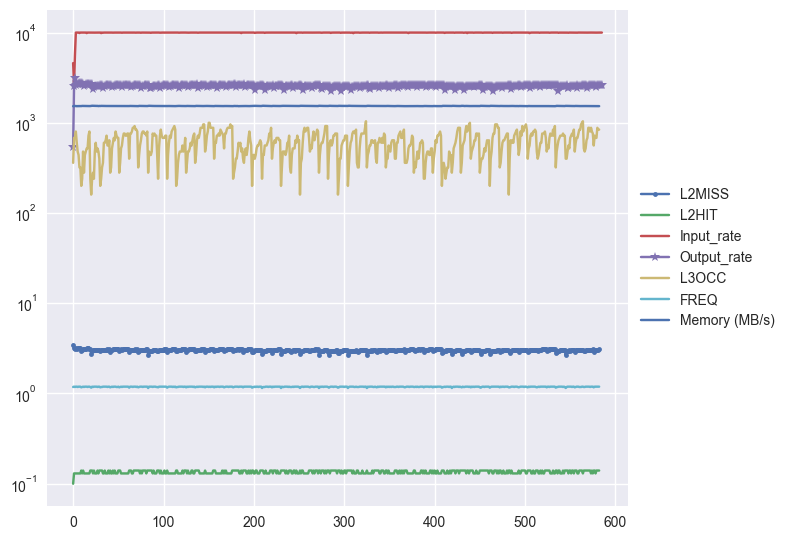

In [25]:
cols = ["L2MISS", "L2HIT", "Input_rate", "Output_rate", "L3OCC", "FREQ", 'Memory (MB/s)']
# Plot each column with a random marker
ax = None
for col in cols:
    ax = causal_df[col].plot(marker=np.random.choice(markers), ax=ax)
    
plt.yscale("log")
#plt.xlim(0,120)
#plt.ylim(0, 1e5)
# Adjust legend and layout

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [26]:
causal_df.corr()["Output_rate"]

EXEC               -0.123625
IPC                -0.147029
FREQ               -0.082155
AFREQ              -0.107866
L3MISS              0.039603
L2MISS             -0.046530
L2HIT               0.188314
L2MPI              -0.044648
L3OCC               0.026838
PhysIPC            -0.139728
PhysIPC%           -0.139775
INSTnom            -0.123975
INSTnom%           -0.124627
READ                0.294817
WRITE               0.289548
skt0-PCIRdCur       0.087565
skt0-RFO            0.082217
skt0-CRd            0.061388
skt0-DRd           -0.015319
skt0-ItoM           0.048142
skt0-PRd            0.005374
skt0-WiL            0.031842
Ch0Read             0.102515
Ch0Write           -0.194702
Ch1Read             0.058443
Ch1Write           -0.221371
Mem Read (MB/s)     0.078488
Mem Write (MB/s)   -0.207943
P. Write (T/s)     -0.067271
Memory (MB/s)      -0.190595
Input_rate          0.331211
Output_rate         1.000000
Name: Output_rate, dtype: float64

# Locate each plateau periods and remove the first one since it must be less than 10. 
causal_df = causal_df[3:].reset_index(drop=True)

# Compute average for each 10 consecutive indexes
causal_df['Group'] = causal_df.index // 10
grouped_avg = causal_df.groupby('Group').mean()
grouped_avg = normalize(grouped_avg)

# Compute the average for specific index ranges
averages = []

# Setting the initial start index
start_index = 3

while start_index < len(causal_df):
    end_index = start_index + 5  # Because you want to include 3-7, which is 5 values
    avg = causal_df.iloc[start_index:end_index].mean()
    averages.append(avg)
    
    # Increment the start index by 10 to move to the next range
    start_index += 10

result = pd.concat(averages, axis=1)
#result.T.head(100)
grouped_avg = result.T


In [27]:
grouped_avg = causal_df.iloc[(causal_df.index%10 >= 4) | (causal_df.index%10 <= 8)].reset_index(drop=True).dropna()
grouped_avg.head()

,EXEC,IPC,FREQ,AFREQ,L3MISS,L2MISS,L2HIT,L2MPI,L3OCC,PhysIPC,...,Ch0Read,Ch0Write,Ch1Read,Ch1Write,Mem Read (MB/s),Mem Write (MB/s),P. Write (T/s),Memory (MB/s),Input_rate,Output_rate
0,4.43,3.75,1.18,1.19,0.00,3.47,0.10,0.0003,360.0,7.50,...,154.69,274.49,608.04,488.87,762.73,763.36,107410.0,1526.09,4586.114841,535.534883
1,4.46,3.77,1.19,1.19,0.01,3.17,0.13,0.0003,680.0,7.53,...,156.59,272.07,615.59,488.57,772.18,760.64,107273.0,1532.82,2709.619702,2530.203703
2,4.46,3.76,1.18,1.19,0.00,3.15,0.13,0.0003,680.0,7.53,...,157.13,273.32,615.19,489.86,772.32,763.19,107356.0,1535.51,5567.639323,3147.503432
3,4.47,3.76,1.19,1.19,0.01,3.17,0.13,0.0003,800.0,7.53,...,156.80,273.33,613.26,489.20,770.06,762.53,107411.0,1532.59,9988.871263,2634.585188
4,4.46,3.77,1.19,1.19,0.00,3.14,0.13,0.0003,600.0,7.53,...,157.36,271.12,613.12,487.04,770.48,758.16,107406.0,1528.64,9992.742558,2671.208494


In [28]:
# Check NaN values from the dataset
nan_rows = grouped_avg[grouped_avg.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [EXEC, IPC, FREQ, AFREQ, L3MISS, L2MISS, L2HIT, L2MPI, L3OCC, PhysIPC, PhysIPC%, INSTnom, INSTnom%, READ, WRITE, skt0-PCIRdCur, skt0-RFO, skt0-CRd, skt0-DRd, skt0-ItoM, skt0-PRd, skt0-WiL, Ch0Read, Ch0Write, Ch1Read, Ch1Write, Mem Read (MB/s), Mem Write (MB/s), P. Write (T/s), Memory (MB/s), Input_rate, Output_rate]
Index: []

[0 rows x 32 columns]


In [ ]:
import os

def list_directories(path):
    """
    Returns a list of directories found at the specified path.
    """
    # List to hold the names of directories
    directories = []
    
    # Check if the path is a valid directory
    if os.path.isdir(path):
        # Iterate over the entries in the specified path
        for entry in os.listdir(path):
            # Construct full path
            full_path = os.path.join(path, entry)
            # If the entry is a directory, add it to the list
            if os.path.isdir(full_path):
                directories.append(entry)
    else:
        print(f"The path {path} is not a valid directory.")
        
    return directories

In [ ]:
path = "../data/pcm/fixed_rate"
ax = None

dirs = list_directories(path)
for dir in dirs:
    print(dir)
    mem = pd.read_csv(path+"/"+ dir + "/pcm-memory.csv",  header=[0,1])
    

    ax = mem[(            'System',           'Memory')].plot(marker=np.random.choice(markers), ax=ax)
    
plt.yscale("log")

# Adjust legend and layout
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
#plt.savefig("1.png")


In [ ]:
mem = pd.read_csv(path+"/"+ "pcm-memory.csv",  header=[0,1])

print("Data dimension: ", mem.shape)
print("Data columns: ", mem.columns)